In [1]:
import os
import sys 

os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config("spark.sql.warehouse.dir", "C:/Users/JSM")\
    .getOrCreate()

In [2]:
#Ridge : OLS + L2제약조건 함수, 오류 계산 등은 다른 페이지 참조

def ridgeGradientDescent(x, y, alpha, iters, L):
    x=np.matrix(x)
    y=np.matrix(y).T
    m, n = np.shape(x)
    beta = np.matrix(np.ones(n)).transpose()
    XT = x.transpose()
    for i in range(0, iters):
        yhat = np.dot(x, beta)
        residuals = yhat - y
        MSE = (residuals.transpose()*residuals)/len(x)
        print "iteration:", i, "MSE:", MSE
        ols_gradient = np.dot(XT, residuals) / m
        beta = beta - alpha * (ols_gradient + (L/m)*beta)
    return beta

def ridgeWeights(xMat,yMat,lam=0.2):
    xTx = xMat.T*xMat
    xTxlamI = xTx + np.eye(np.shape(xMat)[1])*lam
    if linalg.det(xTxlamI) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTxlamI.I * (xMat.T*yMat)
    return ws

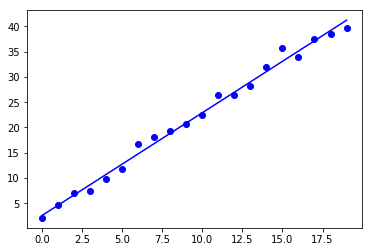

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#선형 polyfit(다차 함수를 선형으로 그려준다.)
import numpy as np
f=np.poly1d( [ 0.2, 0, 3, -7, 5 ] ) #x^4/5+3*x^2-7x+5

import numpy as np
npoints = 20
slope = 2
offset = 3
x = np.arange(npoints)
y = slope * x + offset + np.random.normal(size=npoints) #무작위 수를 더한다.

p = np.polyfit(x,y,1) #계수와 절편을 구할 수 있다.

f=np.poly1d(p) #1차함수로 바뀐다.

import matplotlib.pyplot as plt

f = np.poly1d(p)
fig = plt.figure()
ax  = fig.add_subplot(111)
plt.plot(x, y, 'bo', label="Data")
plt.plot(x,f(x), 'b-',label="Polyfit")
plt.show()

coefficients= [ 6.66666667e-03 -5.92857143e-01  1.54047619e+01 -8.20000000e+01]
polynomial=           3          2
0.006667 x - 0.5929 x + 15.4 x - 82


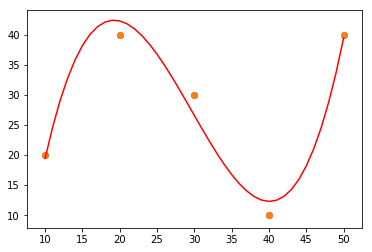

In [8]:
#비선형 polypit
import numpy as np

x=np.linspace(1,7,50)
y=np.sin(x)
x = np.array([10, 20, 30, 40, 50])
y = np.array([20, 40, 30, 10, 40])

%matplotlib inline

import matplotlib.pyplot as plt #수가 엄청 튄다.
plt.scatter(x,y)

np.linspace(1,10,10) #1부터 10까지

coefficients=np.polyfit(x,y,3)
polynomial=np.poly1d(coefficients)
print "coefficients=",coefficients
print "polynomial=",polynomial


plt.scatter(x,y) #비선형 예측 모델 -> 선형보다 더 정확한 편
x50=np.arange(10,51)
plt.plot(x50,polynomial(x50),'r-')
plt.show()